In [1]:
import weave
from weave.ecosystem import umap

/Users/bryanbischof/.pyenv/versions/3.9.7/envs/weave2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
digits = umap.get_mnist(1)["digits"]

In [3]:
labels = umap.get_mnist(1)["labels"]

In [4]:
model = umap.UMAP_fit(digits)

In [7]:
model.transform_plot_2d(digits, labels).summary_plot()

# Compare to

In [3]:
import umap
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
mnist = fetch_openml("mnist_784", version=1)

In [17]:
digits, labels = mnist.data, mnist.target.to_numpy()
type(digits)

pandas.core.frame.DataFrame

In [32]:
mnist.target.astype('int').to_frame().to_numpy()

array([[5],
       [0],
       [4],
       ...,
       [4],
       [5],
       [6]])

In [18]:
type(labels)

numpy.ndarray

In [11]:
reducer = umap.UMAP(random_state=42)
type(reducer)

umap.umap_.UMAP

In [12]:
transformer = reducer.fit(digits)
type(transformer)

umap.umap_.UMAP

In [13]:
embedding = transformer.transform(digits)
type(embedding)

numpy.ndarray

In [14]:
embedding = reducer.fit_transform(digits)

In [15]:

embedding

array([[ 5.669303 ,  8.183317 ],
       [15.640707 ,  6.583423 ],
       [ 0.8223578, 14.785536 ],
       ...,
       [-1.9772627, 14.325363 ],
       [ 3.8114338,  9.689248 ],
       [11.341613 ,  4.030872 ]], dtype=float32)

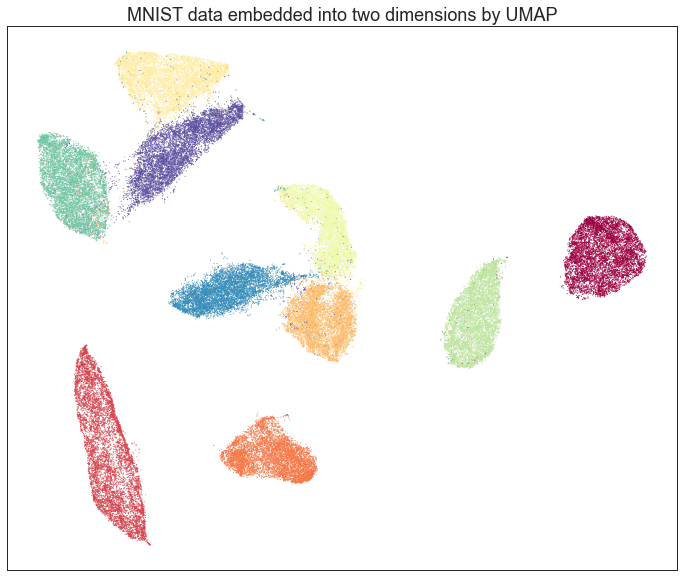

In [33]:
sns.set(context="paper", style="white")
fig, ax = plt.subplots(figsize=(12, 10))
color = mnist.target.astype('int').to_frame().to_numpy()
plt.scatter(embedding[:, 0], embedding[:, 1], c=color, cmap="Spectral", s=0.1)
plt.setp(ax, xticks=[], yticks=[])
plt.title("MNIST data embedded into two dimensions by UMAP", fontsize=18)

plt.show()